First simulate a single neuron (unit) from a single animal. The experiment configuration is already present in a JSON file in the same directory as this notebok.  It imagines an experiment in which there were 5 stim periods of duration 10 seconds, starting at seconds 20, 40, 60, 80, and 100, and for each of those stim periods there were 10 stim events, starting every second.

In [ ]:
# demo/k_onda_demo.ipynb

import sys
from pathlib import Path

REPO_ROOT = Path.cwd().parents[0]
sys.path.insert(0, str(REPO_ROOT))

from k_onda.main import run_pipeline
import json, random


CONFIG_PATH = Path("config.json")

DURATION_SECONDS = 100
FIRING_RATE_SPS = 10
NUM_SPIKES = DURATION_SECONDS * FIRING_RATE_SPS
random.seed(42)
spike_times = sorted(random.uniform(0, DURATION_SECONDS) for _ in range(NUM_SPIKES))

with open(CONFIG_PATH, "r+", encoding="utf-8") as f:
    config = json.load(f)
    unit = config["animals"][0]["units"]["good"][0]
    unit["spike_times"] = [round(t, 4) for t in spike_times]
    unit["firing_rate"] = round(len(spike_times) / DURATION_SECONDS, 2)
    f.seek(0)
    json.dump(config, f, indent=2)
    f.truncate()

Now configure the calculation we are going to do and the plot we are going to make. The following configuration averages first over events, then over periods, to produce a peristimulus time histogram.

In [1]:
psth_plot = {
    'plot_type': 'psth',
    'section': {
        'attr': 'calc',
        'aesthetics': {
            'ax': {'border': {'top': {'visible': 'FFF'}, 'right': {'visible': 'FFF'}}},
            'default': {
                'marker': {'color': '#1f77b4'},
                'indicator': {'type': 'patch', 'when': (0, .05)}}},
        'label': {'x_bottom': {'text': 'Seconds'},
                  'y_left': {'text': 'Firing Rate (Spikes per Second)'},
                  'title': {'text': 'Peristimulus Time Histogram', 'kwargs': {'y': 1.05}}},
        'divisions': [{'divider_type': 'period_type', 'members': ['stim']}]
    }
}

PSTH_OPTS = {
    
    'procedure': 'make_plots',
    'plot_spec': psth_plot,
    'write_opts': './psth',
    'calc_opts': {'kind_of_data': 'spike', 'calc_type': 'firing_rates',
                  'base': 'event', 'bin_size': .01, 
                  'periods': {'stim': {'period_pre_post': (1, 0), 'event_pre_post': (.05, 1)}} 
    }}

Now run the pipeline.  The grey patch represents the imagined duration of the simulus (.05s).

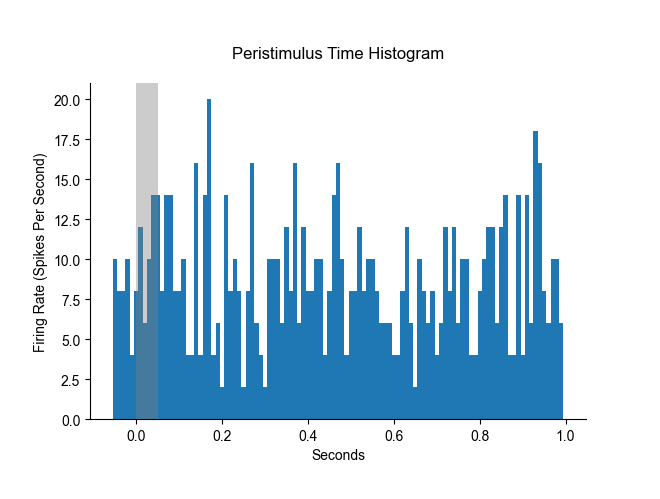

In [4]:
run_pipeline(config_file=CONFIG_PATH, opts=PSTH_OPTS)